[View in Colaboratory](https://colab.research.google.com/github/Curiousss/InkerIntern/blob/master/FER_WINO_SEPARABLE_NO_CUDNN.ipynb)

In [7]:
from google.colab import files
uploaded = files.upload()

Saving baddata.txt to baddata.txt


In [1]:
!ls

datalab


In [42]:
import os
!export TF_ENABLE_WINOGRAD_NONFUSED=1
os.environ['TF_ENABLE_WINOGRAD_NONFUSED'] = '1'
os.environ.pop('TF_ENABLE_WINOGRAD_NONFUSED', None)

'1'

In [2]:
!tar xvf fer2013.tar
!ls

fer2013/fer2013.csv
fer2013/README
fer2013/fer2013.bib
fer2013/
datalab  fer2013  fer2013.tar


In [3]:

import csv
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, InputLayer
from keras.layers import Convolution2D, SeparableConv2D, MaxPooling2D, BatchNormalization 
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
img_rows, img_cols = 48, 48
batch_size = 128
classes = 7
epoch = 100
img_channels = 1

In [0]:
import csv
f = open('fer2013/fer2013.csv')
csv_f = csv.reader(f)


In [0]:
train_x = []
train_y = []
val_x =[]
val_y =[]

In [0]:
ToBeRemovedTrainingData = []
with open("baddata.txt", "r") as text:
  for line in text:
    ToBeRemovedTrainingData.append(int(line))

In [0]:
num=0
for row in csv_f:
  num = num +1
  if num in ToBeRemovedTrainingData or num==1:
    continue
  #print(row)
  #print(num)
  temp_list = []
  for pixel in row[1].split( ):
    temp_list.append(int(pixel))

  if str(row[2]) == "Training":
    train_y.append(int(row[0]))
    train_x.append(temp_list) 
  elif str(row[2]) == "PublicTest":
    val_y.append(int(row[0]))
    val_x.append(temp_list)

In [0]:
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
val_x = np.asarray(val_x)
val_y = np.asarray(val_y)

In [0]:
train_x = train_x.reshape(train_x.shape[0], 48, 48)
train_x = train_x.reshape(train_x.shape[0], 48, 48, 1 )
train_y = np_utils.to_categorical(train_y, 7)

In [0]:
val_x = val_x.reshape(val_x.shape[0], 48, 48)
val_x = val_x.reshape(val_x.shape[0], 48, 48, 1)
val_y = np_utils.to_categorical(val_y, 7)

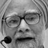

In [13]:
from PIL import Image

#print(train_x.shape)

showimg = train_x[1].reshape(48,48)
img = Image.fromarray(showimg.astype('uint8'))
from IPython.display import display
display(img)

In [0]:
train_x = train_x.astype('float32')
train_x = train_x / 255.0
val_x = val_x.astype('float32')
val_x = val_x / 255.0
train_x = train_x - 0.5
train_x = train_x * 2
val_x = val_x - 0.5
val_x = val_x * 2


In [0]:
input_shape = (img_rows, img_cols, img_channels)
model = Sequential()
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same',
                            name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.3))

model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.3))

model.add(SeparableConv2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.3))

model.add(SeparableConv2D(filters=512, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=512, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.3))


model.add(SeparableConv2D(filters=1024, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=1024, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))


#model.add(Flatten())
'''

model.add(Dense(2048))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.5))
'''
model.add(InputLayer(input_shape=(3, 3, 2048)))
model.add(GlobalAveragePooling2D())
'''
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.5))
'''
model.add(Dense(7))
model.add(Activation('softmax'))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (SeparableConv2D (None, 48, 48, 64)        137       
_________________________________________________________________
batch_normalization_35 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
leaky_re_lu_35 (LeakyReLU)   (None, 48, 48, 64)        0         
_________________________________________________________________
separable_conv2d_31 (Separab (None, 48, 48, 64)        4736      
_________________________________________________________________
batch_normalization_36 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 24, 24, 64)        0         
__________

In [0]:
model.compile(optimizer='Adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
filepath='Model.best.hdf5'
checkpointer = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')


In [0]:
model.load_weights('Model.best.hdf5')

In [42]:

import time
start_time = time.time()

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    shear_range=0.2,
    zoom_range=0.2)  # randomly flip images

datagen.fit(train_x)

model.fit_generator(datagen.flow(train_x, train_y,
                    batch_size=batch_size),
                    steps_per_epoch=(train_x.shape[0]/batch_size),
                    epochs=50,
                    validation_data=(val_x, val_y),
                    callbacks=[checkpointer])
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
224/223 [==============================] - 58s 257ms/step - loss: 0.3394 - acc: 0.8764 - val_loss: 1.2875 - val_acc: 0.6725

Epoch 00001: val_acc improved from 0.66890 to 0.67252, saving model to Model.best.hdf5
Epoch 2/50
224/223 [==============================] - 57s 257ms/step - loss: 0.3430 - acc: 0.8767 - val_loss: 1.4764 - val_acc: 0.6491

Epoch 00002: val_acc did not improve from 0.67252
Epoch 3/50
 16/223 [=>............................] - ETA: 51s - loss: 0.3309 - acc: 0.8750

224/223 [==============================] - 58s 258ms/step - loss: 0.3299 - acc: 0.8824 - val_loss: 1.5393 - val_acc: 0.6441

Epoch 00003: val_acc did not improve from 0.67252
Epoch 4/50
224/223 [==============================] - 58s 258ms/step - loss: 0.3253 - acc: 0.8823 - val_loss: 1.4303 - val_acc: 0.6697

Epoch 00004: val_acc did not improve from 0.67252
Epoch 5/50
 51/223 [=====>........................] - ETA: 42s - loss: 0.3004 - acc: 0.8906

224/223 [==============================] - 58s 258ms/step - loss: 0.3164 - acc: 0.8855 - val_loss: 1.4804 - val_acc: 0.6569

Epoch 00005: val_acc did not improve from 0.67252
Epoch 6/50
224/223 [==============================] - 58s 260ms/step - loss: 0.3258 - acc: 0.8827 - val_loss: 1.4643 - val_acc: 0.6647

Epoch 00006: val_acc did not improve from 0.67252
Epoch 7/50
 57/223 [======>.......................] - ETA: 41s - loss: 0.2852 - acc: 0.9001

224/223 [==============================] - 58s 260ms/step - loss: 0.3084 - acc: 0.8899 - val_loss: 1.5212 - val_acc: 0.6463

Epoch 00007: val_acc did not improve from 0.67252
Epoch 8/50
224/223 [==============================] - 58s 259ms/step - loss: 0.3149 - acc: 0.8866 - val_loss: 1.4866 - val_acc: 0.6639

Epoch 00008: val_acc did not improve from 0.67252
Epoch 9/50
 58/223 [======>.......................] - ETA: 41s - loss: 0.2976 - acc: 0.8961

224/223 [==============================] - 58s 259ms/step - loss: 0.3036 - acc: 0.8918 - val_loss: 1.4655 - val_acc: 0.6432

Epoch 00009: val_acc did not improve from 0.67252
Epoch 10/50
224/223 [==============================] - 58s 259ms/step - loss: 0.3047 - acc: 0.8913 - val_loss: 1.4992 - val_acc: 0.6547

Epoch 00010: val_acc did not improve from 0.67252
Epoch 11/50
 57/223 [======>.......................] - ETA: 41s - loss: 0.2977 - acc: 0.8904

224/223 [==============================] - 58s 258ms/step - loss: 0.3047 - acc: 0.8886 - val_loss: 1.5480 - val_acc: 0.6435

Epoch 00011: val_acc did not improve from 0.67252
Epoch 12/50
224/223 [==============================] - 58s 259ms/step - loss: 0.2986 - acc: 0.8919 - val_loss: 1.4908 - val_acc: 0.6591

Epoch 00012: val_acc did not improve from 0.67252
Epoch 13/50
 57/223 [======>.......................] - ETA: 41s - loss: 0.2899 - acc: 0.8950

224/223 [==============================] - 58s 259ms/step - loss: 0.3009 - acc: 0.8914 - val_loss: 1.5195 - val_acc: 0.6616

Epoch 00013: val_acc did not improve from 0.67252
Epoch 14/50
224/223 [==============================] - 58s 259ms/step - loss: 0.2947 - acc: 0.8945 - val_loss: 1.6386 - val_acc: 0.6527

Epoch 00014: val_acc did not improve from 0.67252
Epoch 15/50
 57/223 [======>.......................] - ETA: 41s - loss: 0.2725 - acc: 0.9042

224/223 [==============================] - 58s 258ms/step - loss: 0.2882 - acc: 0.8969 - val_loss: 1.4895 - val_acc: 0.6639

Epoch 00015: val_acc did not improve from 0.67252
Epoch 16/50
224/223 [==============================] - 58s 259ms/step - loss: 0.2906 - acc: 0.8965 - val_loss: 1.4912 - val_acc: 0.6586

Epoch 00016: val_acc did not improve from 0.67252
Epoch 17/50
 57/223 [======>.......................] - ETA: 41s - loss: 0.2654 - acc: 0.9068

224/223 [==============================] - 58s 259ms/step - loss: 0.2901 - acc: 0.8961 - val_loss: 1.5202 - val_acc: 0.6611

Epoch 00017: val_acc did not improve from 0.67252
Epoch 18/50
224/223 [==============================] - 58s 259ms/step - loss: 0.2770 - acc: 0.9009 - val_loss: 1.4521 - val_acc: 0.6661

Epoch 00018: val_acc did not improve from 0.67252
Epoch 19/50
 57/223 [======>.......................] - ETA: 41s - loss: 0.2698 - acc: 0.9068

224/223 [==============================] - 58s 258ms/step - loss: 0.2807 - acc: 0.9001 - val_loss: 1.5738 - val_acc: 0.6555

Epoch 00019: val_acc did not improve from 0.67252
Epoch 20/50
224/223 [==============================] - 58s 260ms/step - loss: 0.2820 - acc: 0.8986 - val_loss: 1.5689 - val_acc: 0.6522

Epoch 00020: val_acc did not improve from 0.67252
Epoch 21/50
 57/223 [======>.......................] - ETA: 41s - loss: 0.2640 - acc: 0.9045

224/223 [==============================] - 58s 259ms/step - loss: 0.2762 - acc: 0.9022 - val_loss: 1.5203 - val_acc: 0.6536

Epoch 00021: val_acc did not improve from 0.67252
Epoch 22/50
224/223 [==============================] - 58s 259ms/step - loss: 0.2685 - acc: 0.9042 - val_loss: 1.5098 - val_acc: 0.6770

Epoch 00022: val_acc improved from 0.67252 to 0.67699, saving model to Model.best.hdf5
Epoch 23/50
 52/223 [=====>........................] - ETA: 42s - loss: 0.2476 - acc: 0.9124

224/223 [==============================] - 58s 259ms/step - loss: 0.2615 - acc: 0.9058 - val_loss: 1.4586 - val_acc: 0.6616

Epoch 00023: val_acc did not improve from 0.67699
Epoch 24/50
224/223 [==============================] - 58s 259ms/step - loss: 0.2692 - acc: 0.9046 - val_loss: 1.6843 - val_acc: 0.6368

Epoch 00024: val_acc did not improve from 0.67699
Epoch 25/50
 56/223 [======>.......................] - ETA: 42s - loss: 0.2687 - acc: 0.9065

224/223 [==============================] - 58s 259ms/step - loss: 0.2713 - acc: 0.9039 - val_loss: 1.5548 - val_acc: 0.6575

Epoch 00025: val_acc did not improve from 0.67699
Epoch 26/50
224/223 [==============================] - 58s 259ms/step - loss: 0.2693 - acc: 0.9036 - val_loss: 1.5870 - val_acc: 0.6669

Epoch 00026: val_acc did not improve from 0.67699
Epoch 27/50
 57/223 [======>.......................] - ETA: 41s - loss: 0.2409 - acc: 0.9147

224/223 [==============================] - 58s 259ms/step - loss: 0.2584 - acc: 0.9073 - val_loss: 1.5636 - val_acc: 0.6522

Epoch 00027: val_acc did not improve from 0.67699
Epoch 28/50
224/223 [==============================] - 58s 258ms/step - loss: 0.2569 - acc: 0.9097 - val_loss: 1.5911 - val_acc: 0.6524

Epoch 00028: val_acc did not improve from 0.67699
Epoch 29/50
 57/223 [======>.......................] - ETA: 41s - loss: 0.2432 - acc: 0.9127

224/223 [==============================] - 58s 260ms/step - loss: 0.2577 - acc: 0.9076 - val_loss: 1.5881 - val_acc: 0.6536

Epoch 00029: val_acc did not improve from 0.67699
Epoch 30/50
224/223 [==============================] - 58s 259ms/step - loss: 0.2590 - acc: 0.9091 - val_loss: 1.7371 - val_acc: 0.6416

Epoch 00030: val_acc did not improve from 0.67699
Epoch 31/50
 57/223 [======>.......................] - ETA: 41s - loss: 0.2479 - acc: 0.9157

224/223 [==============================] - 58s 258ms/step - loss: 0.2531 - acc: 0.9108 - val_loss: 1.5930 - val_acc: 0.6639

Epoch 00031: val_acc did not improve from 0.67699
Epoch 32/50
224/223 [==============================] - 58s 259ms/step - loss: 0.2577 - acc: 0.9079 - val_loss: 1.5665 - val_acc: 0.6513

Epoch 00032: val_acc did not improve from 0.67699
Epoch 33/50
 57/223 [======>.......................] - ETA: 41s - loss: 0.2259 - acc: 0.9193

224/223 [==============================] - 58s 258ms/step - loss: 0.2380 - acc: 0.9161 - val_loss: 1.5912 - val_acc: 0.6563

Epoch 00033: val_acc did not improve from 0.67699
Epoch 34/50
224/223 [==============================] - 58s 259ms/step - loss: 0.2452 - acc: 0.9128 - val_loss: 1.5864 - val_acc: 0.6647

Epoch 00034: val_acc did not improve from 0.67699
Epoch 35/50
 57/223 [======>.......................] - ETA: 41s - loss: 0.2321 - acc: 0.9198

224/223 [==============================] - 58s 258ms/step - loss: 0.2489 - acc: 0.9107 - val_loss: 1.5172 - val_acc: 0.6608

Epoch 00035: val_acc did not improve from 0.67699
Epoch 36/50
224/223 [==============================] - 58s 259ms/step - loss: 0.2451 - acc: 0.9127 - val_loss: 1.6294 - val_acc: 0.6566

Epoch 00036: val_acc did not improve from 0.67699
Epoch 37/50
 57/223 [======>.......................] - ETA: 41s - loss: 0.2445 - acc: 0.9123

224/223 [==============================] - 58s 259ms/step - loss: 0.2466 - acc: 0.9131 - val_loss: 1.5795 - val_acc: 0.6508

Epoch 00037: val_acc did not improve from 0.67699
Epoch 38/50
224/223 [==============================] - 58s 259ms/step - loss: 0.2333 - acc: 0.9175 - val_loss: 1.6474 - val_acc: 0.6544

Epoch 00038: val_acc did not improve from 0.67699
Epoch 39/50
 57/223 [======>.......................] - ETA: 41s - loss: 0.2227 - acc: 0.9213

224/223 [==============================] - 58s 259ms/step - loss: 0.2380 - acc: 0.9165 - val_loss: 1.5986 - val_acc: 0.6644

Epoch 00039: val_acc did not improve from 0.67699
Epoch 40/50
224/223 [==============================] - 58s 258ms/step - loss: 0.2402 - acc: 0.9177 - val_loss: 1.5483 - val_acc: 0.6611

Epoch 00040: val_acc did not improve from 0.67699
Epoch 41/50
 57/223 [======>.......................] - ETA: 41s - loss: 0.2112 - acc: 0.9253

224/223 [==============================] - 58s 258ms/step - loss: 0.2373 - acc: 0.9172 - val_loss: 1.5747 - val_acc: 0.6524

Epoch 00041: val_acc did not improve from 0.67699
Epoch 42/50
224/223 [==============================] - 58s 258ms/step - loss: 0.2326 - acc: 0.9193 - val_loss: 1.5724 - val_acc: 0.6625

Epoch 00042: val_acc did not improve from 0.67699
Epoch 43/50
 57/223 [======>.......................] - ETA: 41s - loss: 0.2226 - acc: 0.9224

224/223 [==============================] - 58s 259ms/step - loss: 0.2359 - acc: 0.9157 - val_loss: 1.6017 - val_acc: 0.6594

Epoch 00043: val_acc did not improve from 0.67699
Epoch 44/50
224/223 [==============================] - 58s 258ms/step - loss: 0.2363 - acc: 0.9154 - val_loss: 1.6749 - val_acc: 0.6508

Epoch 00044: val_acc did not improve from 0.67699
Epoch 45/50
 57/223 [======>.......................] - ETA: 41s - loss: 0.2119 - acc: 0.9265

224/223 [==============================] - 58s 259ms/step - loss: 0.2266 - acc: 0.9202 - val_loss: 1.6340 - val_acc: 0.6686

Epoch 00045: val_acc did not improve from 0.67699
Epoch 46/50
224/223 [==============================] - 58s 259ms/step - loss: 0.2245 - acc: 0.9200 - val_loss: 1.6163 - val_acc: 0.6508

Epoch 00046: val_acc did not improve from 0.67699
Epoch 47/50
 57/223 [======>.......................] - ETA: 41s - loss: 0.2075 - acc: 0.9278

224/223 [==============================] - 58s 259ms/step - loss: 0.2239 - acc: 0.9217 - val_loss: 1.6922 - val_acc: 0.6572

Epoch 00047: val_acc did not improve from 0.67699
Epoch 48/50
224/223 [==============================] - 58s 260ms/step - loss: 0.2215 - acc: 0.9226 - val_loss: 1.6215 - val_acc: 0.6644

Epoch 00048: val_acc did not improve from 0.67699
Epoch 49/50
 57/223 [======>.......................] - ETA: 41s - loss: 0.1983 - acc: 0.9302

224/223 [==============================] - 58s 258ms/step - loss: 0.2202 - acc: 0.9224 - val_loss: 1.5752 - val_acc: 0.6628

Epoch 00049: val_acc did not improve from 0.67699
Epoch 50/50
224/223 [==============================] - 58s 260ms/step - loss: 0.2283 - acc: 0.9211 - val_loss: 1.5224 - val_acc: 0.6728

Epoch 00050: val_acc did not improve from 0.67699
--- 2898.4267241954803 seconds ---


In [0]:
def predict_emotion(model, pic):
  pic = pic.convert('L')
  pic = pic.resize((48,48))
  
  from IPython.display import display
  display(pic)
  pic_np=np.asarray(pic)#.getdata()).reshape(48, 48, 1)
  pic_np = pic_np.reshape(1, 48, 48, 1)
  print(pic_np.shape)
  pic_np = pic_np / 255.0
  pic_np = pic_np - 0.5
  pic_np = pic_np * 2
  
  print(pic_np.shape)
  y = model.predict(pic_np)
  print("0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral")
  print(y)

In [33]:
from google.colab import files
uploaded = files.upload()

Saving celebfer2.jpg to celebfer2.jpg


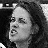

(1, 48, 48, 1)
(1, 48, 48, 1)
0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
[[0.18686783 0.00278126 0.02311718 0.1430708  0.5308481  0.00143547
  0.1118793 ]]


In [31]:
celebanger = Image.open("celeb_fer1.jpg")
predict_emotion(model, celebanger)


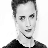

(1, 48, 48, 1)
(1, 48, 48, 1)
0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
[[0.5319344  0.00196936 0.07488633 0.05328509 0.07548652 0.00826073
  0.25417757]]


In [32]:
celeb = Image.open("Celeb.jpg")
predict_emotion(model, celeb)

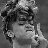

(1, 48, 48, 1)
(1, 48, 48, 1)
0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
[[0.10406367 0.00218619 0.01129904 0.34656185 0.37932992 0.00104361
  0.1555157 ]]


In [35]:
celeb = Image.open("celebfer2.jpg")
predict_emotion(model, celeb)